In [1]:
import os
import pandas as pd
import transformers
import torch
import numpy as np
from Code.utinity import *
from Code.models import *

from tqdm import tqdm

In [2]:
class LLM_u(LLM):


    def get_attention_matrix(self,outputs):
        A = 0
        for layer in range(len(outputs.attentions)):
            X = outputs.attentions[layer][0].to(torch.float32).cpu().detach().numpy()
            for i in range(len(X)):
                Ai = (X[i] + X[i].T)/2
                A = (A+Ai)/2 + abs(A-Ai)/2 
        A = np.triu(A)
        return A

def RunEval(problem,solvers,use_temp=True):
    results = {}
    accuracy = {}
    results[problem.name] = []
    accuracy[problem.name] = []
    for i,solver in enumerate(solvers):
        evaluation = Evaluation(problem,solver,later=False,use_temp=use_temp)
        df1,df2 = evaluation.save(filename='result/'+problem.name+'_'+solver.name+'.xlsx')
        results[problem.name].append(df1)
        accuracy[problem.name].append(df2)
    return pd.concat(accuracy[problem.name],axis=1).T
    

## 算法设定

以 Llama2 为基础模型，比较现有算法（baseline）和我们设计的算法（ours）

In [3]:
model_names = ['baichuan','qwen', 'falcon', 'llama2']
result_SLPWC = []
result_WSD = []
for model_name in model_names:
    llm = LLM_u(model_name,load_model=False)
    
    llm.model_name = model_name + 'uu_test_attention'
    solver_baseline = Solver_Baseline(llm) 
    solver_ours_v = Solver_Ours(llm, repeat=1, shift=False, attention=True)
    solver_ours_vv = Solver_Ours(llm, repeat=2, shift=False, attention=True)
    solver_ours_vvv = Solver_Ours(llm, repeat=3, shift=False, attention=True)
    solver_ours_vvvv = Solver_Ours(llm, repeat=4, shift=False, attention=True)
    solver_ours_vvvvv = Solver_Ours(llm, repeat=5, shift=False, attention=True)

    llm.model_name = model_name + 'uu_test_echo'
    solver_echo_vv = Solver_Echo(llm, repeat=2)
    solver_echo_vvv = Solver_Echo(llm, repeat=3)
    solver_echo_vvvv = Solver_Echo(llm, repeat=4)
    solver_echo_vvvvv = Solver_Echo(llm, repeat=5)
    solvers = [solver_baseline,solver_ours_v,solver_ours_vv,solver_ours_vvv,solver_ours_vvvv,solver_ours_vvvvv,solver_baseline,solver_echo_vv,solver_echo_vvv,solver_echo_vvvv,solver_echo_vvvvv]
    result1 = RunEval(problem=Problem("Data/SLPWC_v1.csv",name='SLPWC'),solvers=solvers)
    data1 = {
    "model": [solver.name for solver in solvers],
    "distance_shift": [result1.iloc[i, 0] for i in range(len(solvers))],
    "cos_similarity_shift": [result1.iloc[i, 1] for i in range(len(solvers))]
    }
    result_SLPWC.append(data1)

    result2 = RunEval(problem=Problem('Data/WSD_v1.csv',name='WSD'),solvers=solvers)
    data2 = data = {
    "model": [solver.name for solver in solvers],
    "distance_shift": [result2.iloc[i, 0] for i in range(len(solvers))],
    "cos_similarity_shift": [result2.iloc[i, 1] for i in range(len(solvers))]
    }
    result_WSD.append(data2)



model_name = 'bert'
llm = LLM_u(model_name,load_model=False)
llm.model_name = model_name + 'uu_test'
solvers = [Solver_Baseline(llm)]
result1 = RunEval(problem=Problem("Data/SLPWC_v1.csv",name='SLPWC'),solvers=solvers)
data1 = {
    "model": [solver.name for solver in solvers],
    "distance_shift": [result1.iloc[i, 0] for i in range(len(solvers))],
    "cos_similarity_shift": [result1.iloc[i, 1] for i in range(len(solvers))]
    }
result_SLPWC.append(data1)
result2 = RunEval(problem=Problem("Data/WSD_v1.csv",name='WSD'),solvers=solvers)
data2 = data = {
    "model": [solver.name for solver in solvers],
    "distance_shift": [result2.iloc[i, 0] for i in range(len(solvers))],
    "cos_similarity_shift": [result2.iloc[i, 1] for i in range(len(solvers))]
    }
result_WSD.append(data2)


读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_baseline.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_ours_v.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_ours_vv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_ours_vvv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_ours_vvvv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_ours_vvvvv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_attention_baseline.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_echo_echovv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_echo_echovvv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_echo_echovvvv.dat
读取文件： Temp/temp_embeddings_SLPWC_baichuanuu_test_echo_echovvvvv.dat
读取文件： Temp/temp_embeddings_WSD_baichuanuu_test_attention_baseline.dat
读取文件： Temp/temp_embeddings_WSD_baichuanuu_test_attention_ours_v.dat
读取文件： Temp/temp_embeddings_WSD_baichuanuu_test_attention_ours_vv.dat
读取文件： Temp/temp_embeddi

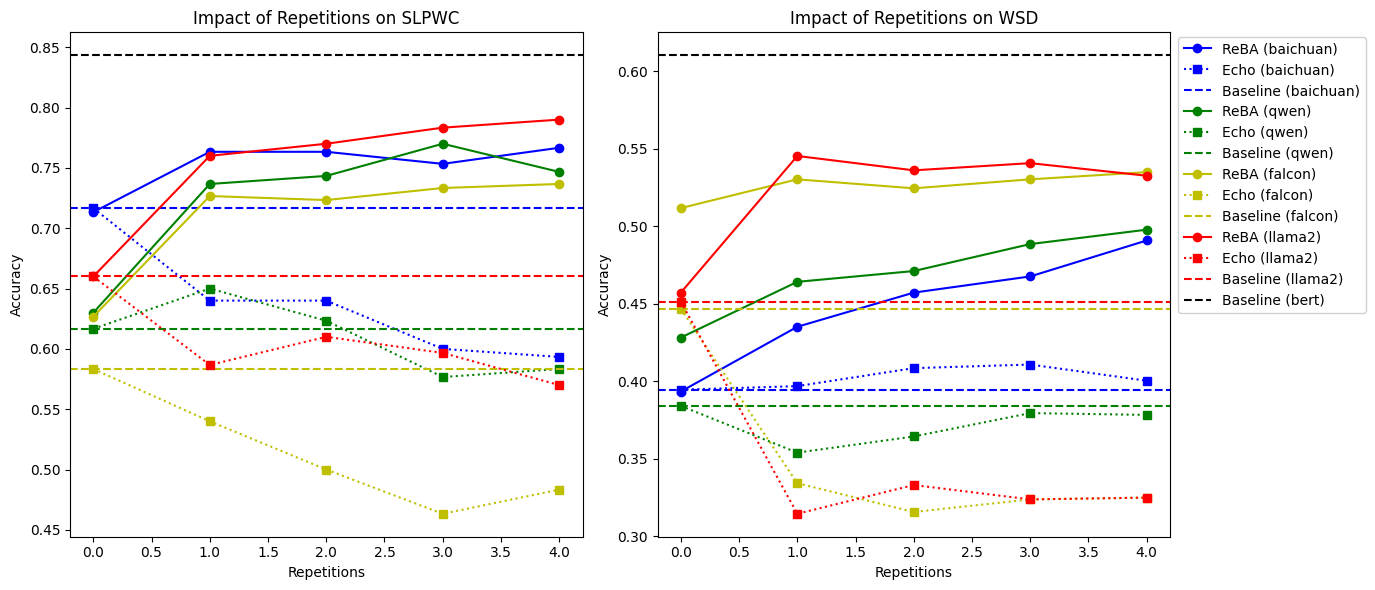

In [16]:

import matplotlib.pyplot as plt
import pandas as pd
import re


def plot_results(ax, dataset, title, colors, labels_added):
    for i, data in enumerate(dataset):
        if i == len(dataset)-1:
            break
        df = pd.DataFrame(data)        
        df['repetitions'] = df['model'].apply(lambda x: 0 if 'baseline' in x else x.count('v') - 1)

        label_reba = 'ReBA (' + re.match(r"(.*?)uu", df['model'][0]).group(1) + ')'
        label_echo = 'Echo (' + re.match(r"(.*?)uu", df['model'][0]).group(1) + ')'
        label_baseline = 'Baseline (' + re.match(r"(.*?)uu", df['model'][0]).group(1) + ')'

        ax.plot(df['repetitions'][1:6], df['distance_shift'][1:6], marker='o', color=colors[i], 
                 label=label_reba if label_reba not in labels_added else None)
        ax.plot(df['repetitions'][6:], df['distance_shift'][6:], marker='s', linestyle=':',
                 color=colors[i], label=label_echo if label_echo not in labels_added else None)
        
        baseline_distance = df[df['model'].str.contains('baseline')]['distance_shift'].values[0]
        ax.axhline(y=baseline_distance, color=colors[i], linestyle='--', 
                   label=label_baseline if label_baseline not in labels_added else None)


        labels_added.update({label_reba, label_echo, label_baseline})

    df = pd.DataFrame(dataset[-1])
    label_bert = 'Baseline (bert)'
    baseline_distance = df[df['model'].str.contains('baseline')]['distance_shift'].values[0]
    ax.axhline(y=baseline_distance, color='black', linestyle='--', 
               label = label_bert if label_bert not in labels_added else None)
    labels_added.update({label_bert})

    ax.set_title(title)
    ax.set_xlabel('Repetitions')
    ax.set_ylabel('Accuracy')
    ax.grid(False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  
colors = ['b', 'g', 'y', 'r']
labels_added = set()

plot_results(axes[0], result_SLPWC, 'Impact of Repetitions on SLPWC', colors, labels_added)
plot_results(axes[1], result_WSD, 'Impact of Repetitions on WSD', colors, labels_added)

fig.legend(loc='center left', bbox_to_anchor=(0.84, 0.7), framealpha=0.9, labelspacing=0.5)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("combined_results_no_duplicate_labels.pdf", format='pdf')
plt.show()
